# The 2D Poisson Process and Voronoi Tessellation

A Voronoi tessellation of a domain $\Omega$ to a set of points in $\Omega$, called seeds, sites or generators, is the partition of $\Omega$ into subsets where each subset is associated with a single seed and consists of the points which are closest to that particular seed. The image of $\Omega$ with its partitions is called a Voronoi diagram. <br/>
In this notebook, we are going to tessellate the domain $\Omega=[0,1)^2$ using seeds generated by a two-dimensional Poisson process.

For the two-dimensional Poisson process, we divide our domain into squares $S_{ij} = \left[\frac{i}{m},\frac{i+1}{m}\right)\times\left[\frac{j}{n},\frac{j+1}{n}\right), i \in \{0,...,m-1\}, j \in \{0,..., n-1\}$, sample independent $Poisson(\lambda)$-distributed random variables $Y_{ij}$ (or one $Y \sim Poisson(\lambda)$ multiple times), which represent the number of seeds in square $S_{ij}$, and sample $Y_{ij}$ independent uniform random variables on the square $S_{ij}$.

In [21]:
import numpy as np

# specify the number of squares
n = # SET NUMBER OF SQUARES IN Y-DIRECTION
m = # SET NUMBER OF SQUARES IN X-DIRECTION

# specify expected number of events occurring in a fixed-time interval 
# (check: where is the time interval?)
lmbda = # PLAY WITH LAMBDA = MU*T

# sample m*n i.i.d. Yij ~ Poisson(lambda)
nseeds_array = np.random.poisson(lam=lmbda, size=m*n)
nseeds_matrix = nseeds_array.reshape(m,n)

# create the point array
points = np.zeros((np.sum(nseeds_array), 2))
idx = 0
for i in range(m):
    for j in range(n):
        for k in range(nseeds_matrix[i,j]):
            # sample a r.v.~ Unif(Sij)
            xijk = np.random.uniform(i/m, (i+1)/m)
            yijk = np.random.uniform(j/n, (j+1)/n)
            # save these coordinates
            points[idx,:] = np.array([xijk,yijk])
            # increase index for points[]
            idx += 1

Now we are ready to create the Voronoi tessellation and plot the Voronoi diagram.

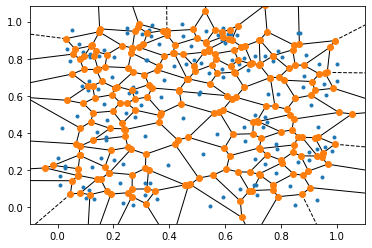

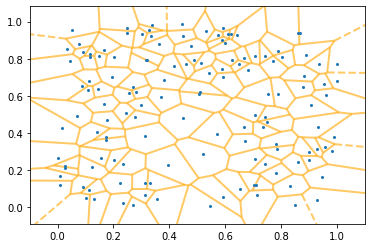

In [25]:
from scipy.spatial import Voronoi, voronoi_plot_2d

# tessellate
vor = Voronoi(points)

# plot
# COMMENT IN THE PLOT OF CHOICE
#fig1 = voronoi_plot_2d(vor)
#fig2 = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=4)